In [80]:
# Wczytanie danych
import pandas as pd
df = pd.read_csv("default_credit_card.csv", sep=";", header=0)
df.head()

In [81]:
# Opis wyświeltenie wartości(count, mean itd)
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [83]:
# Przygotowanie danych
df = df.dropna()

X = df.drop(["SEX", "EDUCATION", "MARRIAGE", "default payment next month"], axis=1)
y = df["default payment next month"]


In [84]:
# Podział danych
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, random_state=1)

In [85]:
# Normalizacja danych - skalowanie
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                     # Tworzenie nowej instancji
scaler.fit(X_train)                           # Wyliczenie średniej i odchylenia standardowego

X_train = scaler.transform(X_train)            # transformacie czyli skalowanie - zamiana
X_test = scaler.transform(X_test)             # X_train nie jest już data frame tylko tablica numpy

pd.DataFrame(X_train).describe()              # Stworzenie spowrotem data frame
#pd.DataFrame(X_test).describe()               

e:\kurs-ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\kurs-ml\venv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
e:\kurs-ml\venv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,2.250000e+04,22500.000000,2.250000e+04,2.250000e+04
mean,-1.124237e-16,-9.789700e-17,2.463215e-17,1.768462e-17,2.084259e-17,-3.821141e-17,-4.800111e-17,3.221127e-17,-2.147418e-17,-3.868510e-17,-4.926430e-17,2.652693e-17,-6.047508e-17,3.536924e-17,-2.542164e-17,-7.579123e-18,1.010550e-17,0.000000,-3.663243e-17,-1.452665e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022,1.000022e+00,1.000022e+00
min,-1.213873e+00,-1.575396e+00,-1.756924e+00,-1.555608e+00,-1.530474e+00,-1.519512e+00,-1.526564e+00,-1.488713e+00,-2.948901e+00,-1.643066e+00,-1.585463e+00,-3.327576e+00,-1.675770e+00,-6.340827e+00,-3.380394e-01,-2.665668e-01,-2.963851e-01,-0.305341,-3.135059e-01,-3.005733e-01
25%,-9.048112e-01,-8.149811e-01,-8.727838e-01,-7.238113e-01,-6.971243e-01,-6.669604e-01,-6.480842e-01,-6.190020e-01,-6.466469e-01,-6.489749e-01,-6.464932e-01,-6.373781e-01,-6.330879e-01,-6.290363e-01,-2.780214e-01,-2.287861e-01,-2.737526e-01,-0.286495,-2.966392e-01,-2.936787e-01
50%,-2.094217e-01,-1.631971e-01,1.135629e-02,1.079857e-01,1.362248e-01,1.855909e-01,2.303961e-01,2.507086e-01,-3.912425e-01,-3.909063e-01,-3.907713e-01,-3.757537e-01,-3.636276e-01,-3.645015e-01,-2.120015e-01,-1.762978e-01,-1.919274e-01,-0.208199,-2.146775e-01,-2.119918e-01
75%,5.632333e-01,5.972177e-01,1.135629e-02,1.079857e-01,1.362248e-01,1.855909e-01,2.303961e-01,2.507086e-01,2.139394e-01,2.010902e-01,1.940711e-01,1.819680e-01,1.663844e-01,1.760711e-01,-3.728890e-02,-4.168137e-02,-3.524082e-02,-0.046296,-4.996359e-02,-6.429689e-02
max,6.435411e+00,4.725183e+00,7.084477e+00,5.930565e+00,6.803018e+00,7.006001e+00,7.258238e+00,7.208393e+00,1.243630e+01,1.318550e+01,1.183428e+01,1.324853e+01,1.464736e+01,1.546316e+01,5.209086e+01,5.492401e+01,5.170266e+01,39.911432,2.778860e+01,3.082951e+01


In [86]:
#display(df)

In [124]:
# import klasy MPLClassifier oraz tranowanie

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=500, learning_rate='constant')

mlp.fit(X_train, y_train)

# Wyniki
mlp.score(X_test, y_test)

0.8161333333333334

# Fragment kodu zmieniający ilość neuronów w warstwie ukrytej

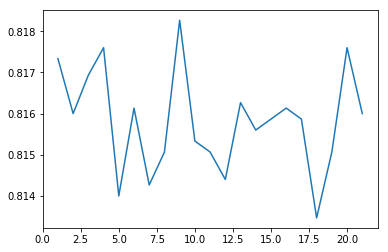

In [93]:
scores = []
neurons = []
for i in range(1,22):
    mlp = MLPClassifier(hidden_layer_sizes = (i))
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    scores.append(score)
    neurons.append(i)

# Wyświetlanie
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(neurons, scores)